In [90]:
import tensorflow as tf 
import numpy as np 
import math
import os 
from PIL import Image 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing 
 

# OP Model_L1

In [204]:
lamlist1=[0.04,0.07,0.10,0.13,0.15,0.2,0.25]
AUCL1=np.array([0.6070571428571429,0.40630476190476195,0.40782857142857143,0.4036571428571428,0.40710476190476186,0.39285714285714285,0.3915047619047619])
lamlist2=[0.015,0.02,0.025,0.04,0.07,0.10,0.13,0.15] 
PRL1=np.array([0.29357312925655565,0.3159233463305543,0.29915674848607077,0.2849368290711838,0.24963745621329458,0.25007210124887275,0.2502763988573238
,0.2503257748739117])

AUCL10=np.max([AUCL1,1-AUCL1],axis=0) 
print(AUCL10)

[0.60705714 0.59369524 0.59217143 0.59634286 0.59289524 0.60714286
 0.60849524]


No handles with labels found to put in legend.
No handles with labels found to put in legend.


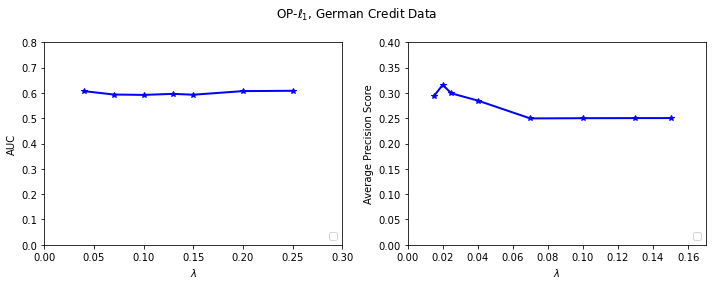

In [205]:
#title='Logistic Regression, TIC \n'
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
#axs[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.title('AUC v.s. Ratio of Outliers')
axs[0].plot(lamlist1,AUCL10, '*-', color='b', lw=2,label='')#,label='{}ROC curve (area)'
axs[1].plot(lamlist2,PRL1, '*-', color='b', lw=2,label='')#,label='{}PRC curve (area)'
x=np.array([0.3,0.17])
y=np.array([0.8,0.4])
s=0
for ax, labels in zip(axs, (('$\lambda$', 'AUC'), ('$\lambda$', 'Average Precision Score'))):
    ax.set_xlim([0.0, x[s]])
    ax.set_ylim([0.0, y[s]])
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.legend(loc="lower right")
    s=s+1
#plt.suptitle('OP-$\ell_1$, German Credit Data \n'+ 'AUC v.s. Ratio of Outliers')
plt.suptitle('OP-$\ell_1$, German Credit Data')
#plt.title('AUC v.s. Ratio of Outliers')
plt.tight_layout(rect=(0.0, 0.0, 1.0, 1.0))
plt.savefig('GermanRatioL1.jpg')
plt.show()

# OP Model_Lp

In [217]:
lamlist1=np.array([0.15,0.2, 0.25,  0.3,0.1,0.13,0.17,0.23, 0.28]) 
plist1=np.array([0.65,0.7,0.75,0.8,0.85,0.9,0.95])
AUCLp=np.array([0.3983619047619048,0.39516190476190477,0.3933714285714286,0.3941714285714286,0.3945333333333333,0.39394285714285715,0.394952380952381,0.43154285714285706, 
0.40544761904761906,0.393904761904762,0.39493333333333336,0.39624761904761907,0.39480000000000004,0.3948190476190476,0.4781714285714286,
0.48695238095238097,0.4720190476190476,0.458552380952381,0.4195809523809524,0.38546666666666674,0.3891619047619048,0.5023619047619047,
0.5074190476190477,0.49614285714285716,0.49411428571428573,0.4708761904761905,0.45963809523809523,0.42704761904761906,0.3948,0.39409523809523805,0.39310476190476196,0.3927428571428573,0.3946857142857143,0.40260952380952386,0.40788571428571424,0.396552380952381,
0.39405714285714283,0.3946095238095238,0.39409523809523805,0.3938666666666667,0.3938285714285714,0.4016,0.3962857142857144,0.39653333333333335,
0.3953904761904762,0.39462857142857144,0.39430476190476194,0.39422857142857143,0.39375238095238096,0.46874285714285713,0.48572380952380956,
0.4722380952380952,0.41276190476190483,0.3820761904761905,0.3935619047619047,0.39380952380952383,0.49268571428571434,0.49462857142857136,
0.495,0.4804,0.4658666666666667,0.42495238095238097,0.406552380952381])
AUCLp0=np.max([AUCLp,1-AUCLp],axis=0)
print(AUCLp0)

[0.6016381  0.6048381  0.60662857 0.60582857 0.60546667 0.60605714
 0.60504762 0.56845714 0.59455238 0.60609524 0.60506667 0.60375238
 0.6052     0.60518095 0.52182857 0.51304762 0.52798095 0.54144762
 0.58041905 0.61453333 0.6108381  0.5023619  0.50741905 0.50385714
 0.50588571 0.52912381 0.5403619  0.57295238 0.6052     0.60590476
 0.60689524 0.60725714 0.60531429 0.59739048 0.59211429 0.60344762
 0.60594286 0.60539048 0.60590476 0.60613333 0.60617143 0.5984
 0.60371429 0.60346667 0.60460952 0.60537143 0.60569524 0.60577143
 0.60624762 0.53125714 0.51427619 0.5277619  0.5872381  0.61792381
 0.6064381  0.60619048 0.50731429 0.50537143 0.505      0.5196
 0.53413333 0.57504762 0.59344762]


In [218]:
ss1=lamlist1.copy()
data=[]
s=0
for lam in lamlist1:
    data0=[]
    for p in plist1:
        data0.append(AUCLp0[s])
        s=s+1
    data.append(np.array(data0))
print(data)
fig1=[]
for ind in np.argsort(ss1):
    fig1.append(data[ind])
print(fig1)

[array([0.6016381 , 0.6048381 , 0.60662857, 0.60582857, 0.60546667,
       0.60605714, 0.60504762]), array([0.56845714, 0.59455238, 0.60609524, 0.60506667, 0.60375238,
       0.6052    , 0.60518095]), array([0.52182857, 0.51304762, 0.52798095, 0.54144762, 0.58041905,
       0.61453333, 0.6108381 ]), array([0.5023619 , 0.50741905, 0.50385714, 0.50588571, 0.52912381,
       0.5403619 , 0.57295238]), array([0.6052    , 0.60590476, 0.60689524, 0.60725714, 0.60531429,
       0.59739048, 0.59211429]), array([0.60344762, 0.60594286, 0.60539048, 0.60590476, 0.60613333,
       0.60617143, 0.5984    ]), array([0.60371429, 0.60346667, 0.60460952, 0.60537143, 0.60569524,
       0.60577143, 0.60624762]), array([0.53125714, 0.51427619, 0.5277619 , 0.5872381 , 0.61792381,
       0.6064381 , 0.60619048]), array([0.50731429, 0.50537143, 0.505     , 0.5196    , 0.53413333,
       0.57504762, 0.59344762])]
[array([0.6052    , 0.60590476, 0.60689524, 0.60725714, 0.60531429,
       0.59739048, 0.59211429])

In [219]:
lamlist2=[0.01,0.03,0.04,0.05,0.06,0.02,0.025,0.03,0.035] # 
plist2=[0.7,0.75,0.8,0.85,0.9,0.95,0.98] 
PRLp=np.array([0.29137160281957175,0.29914687950693525,0.28765381303907617,0.29252472495110227,0.27178545376432617,0.31930446171729604,0.2982905867226382
,0.3067045864380752,0.3267951711155893,0.3079477760493784,0.3065450900046297,0.3032567416239832,0.27397917483097095,0.28974154355097353
,0.30608733325908005,0.2860804884995315,0.29148873350441296,0.30967293558926456,0.297528298407903,0.2887610109432623,0.3243434385446462
,0.2953323510964367,0.30041987584250895,0.31653837757746095,0.3120595083212125,0.293626195169663,0.2502413274861325,0.25023691314006485
,0.24980727967991723,0.24971481955345567,0.24990746133105812,0.25042066548623293,0.2504604643283008,0.24969890778112466,0.2504692332788457,0.28713471865294404,0.30322521869716734,0.2646486409459521,0.28583562474653806,0.31140954877354443,0.30624130679228573,0.3103234755678891
,0.29215282763421907,0.29385368086198305,0.28236337963432295,0.2870508307067014,0.3091561549633724,0.3081319911621838,0.29200863456469317
,0.3067045864380752,0.3267951711155893,0.3079477760493784,0.3065450900046297,0.3032567416239832,0.27397917483097095,0.28974154355097353
,0.29878377232848274,0.31283645700438906,0.3149558951716796,0.2962692187360329,0.3054625121764558,0.3250470630617023,0.30106970557015506])

In [220]:
ss2=lamlist2.copy()
data=[]
s=0
for lam in lamlist2:
    data0=[]
    for p in plist2:
        data0.append(PRLp[s])
        s=s+1
    data.append(np.array(data0))
print(data)
fig2=[]
for ind in np.argsort(ss2):
    fig2.append(data[ind])
print(fig2)

[array([0.2913716 , 0.29914688, 0.28765381, 0.29252472, 0.27178545,
       0.31930446, 0.29829059]), array([0.30670459, 0.32679517, 0.30794778, 0.30654509, 0.30325674,
       0.27397917, 0.28974154]), array([0.30608733, 0.28608049, 0.29148873, 0.30967294, 0.2975283 ,
       0.28876101, 0.32434344]), array([0.29533235, 0.30041988, 0.31653838, 0.31205951, 0.2936262 ,
       0.25024133, 0.25023691]), array([0.24980728, 0.24971482, 0.24990746, 0.25042067, 0.25046046,
       0.24969891, 0.25046923]), array([0.28713472, 0.30322522, 0.26464864, 0.28583562, 0.31140955,
       0.30624131, 0.31032348]), array([0.29215283, 0.29385368, 0.28236338, 0.28705083, 0.30915615,
       0.30813199, 0.29200863]), array([0.30670459, 0.32679517, 0.30794778, 0.30654509, 0.30325674,
       0.27397917, 0.28974154]), array([0.29878377, 0.31283646, 0.3149559 , 0.29626922, 0.30546251,
       0.32504706, 0.30106971])]
[array([0.2913716 , 0.29914688, 0.28765381, 0.29252472, 0.27178545,
       0.31930446, 0.29829059])

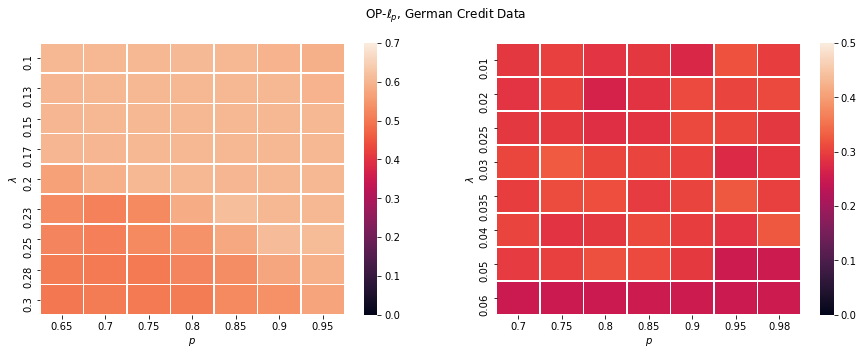

In [221]:
import numpy as np; np.random.seed(0)
import seaborn as sns

# uniform_data = np.random.rand(10, 12)    
# uniform_data2 = np.random.rand(100, 120)

figs, ax =plt.subplots(1,2,figsize=(15, 5))

ax1 = sns.heatmap(fig1, linewidth=0.5, xticklabels=plist1, yticklabels=np.sort(ss1), ax=ax[0],vmin=0, vmax=0.7)
ax1.set(xlabel='$p$', ylabel='$\lambda$')

ax2 = sns.heatmap(np.delete(fig2,3,0), linewidth=0.5, xticklabels=plist2, yticklabels=np.delete(np.sort(ss2),3,0), ax=ax[1],vmin=0, vmax=0.5)
ax2.set(xlabel='$p$', ylabel='$\lambda$')
plt.suptitle('OP-$\ell_p$, German Credit Data')
# sns.heatmap(uniform_data, ax=ax[0])
# sns.heatmap(uniform_data2, ax=ax[1])
plt.savefig('GermanRatioLp.jpg')
plt.show()

# OP Model_ETP

In [222]:
lamlist1=[0.02, 0.04, 0.06, 0.08,0.1,0.12,0.15]
plist1=[0.00000001,0.0000001,0.00001,0.001,1]

AUCETP=np.array([0.6070857142857142,0.6070857142857142,0.6070857142857142,0.6070857142857142,0.6070857142857142,0.6070857142857142,0.6070857142857142,0.6070857142857142
,0.6070857142857142,0.3937142857142857,0.4303809523809524,0.43038095238095236,0.4302285714285714,0.42340952380952385,0.3937904761904762
,0.40662857142857145,0.40662857142857145,0.40662857142857145,0.4067047619047619,0.3932380952380953,0.4078285714285715,0.4078285714285715
,0.4078285714285715,0.40800000000000003,0.3932761904761905,0.40459047619047617,0.40459047619047617,0.40459047619047617,0.4044761904761905
,0.39384761904761906,0.4071238095238095,0.4071428571428571,0.4071428571428571,0.4066666666666667,0.3937142857142857])
AUCETP0=np.max([AUCETP,1-AUCETP],axis=0)
print(AUCETP0)

[0.60708571 0.60708571 0.60708571 0.60708571 0.60708571 0.60708571
 0.60708571 0.60708571 0.60708571 0.60628571 0.56961905 0.56961905
 0.56977143 0.57659048 0.60620952 0.59337143 0.59337143 0.59337143
 0.59329524 0.6067619  0.59217143 0.59217143 0.59217143 0.592
 0.60672381 0.59540952 0.59540952 0.59540952 0.59552381 0.60615238
 0.59287619 0.59285714 0.59285714 0.59333333 0.60628571]


In [223]:
ss1=lamlist1.copy()
data=[]
s=0
for lam in lamlist1:
    data0=[]
    for p in plist1:
        data0.append(AUCETP0[s])
        s=s+1
    data.append(np.array(data0))
print(data)
fig1=[]
for ind in np.argsort(ss1):
    fig1.append(data[ind])
print(fig1)

[array([0.60708571, 0.60708571, 0.60708571, 0.60708571, 0.60708571]), array([0.60708571, 0.60708571, 0.60708571, 0.60708571, 0.60628571]), array([0.56961905, 0.56961905, 0.56977143, 0.57659048, 0.60620952]), array([0.59337143, 0.59337143, 0.59337143, 0.59329524, 0.6067619 ]), array([0.59217143, 0.59217143, 0.59217143, 0.592     , 0.60672381]), array([0.59540952, 0.59540952, 0.59540952, 0.59552381, 0.60615238]), array([0.59287619, 0.59285714, 0.59285714, 0.59333333, 0.60628571])]
[array([0.60708571, 0.60708571, 0.60708571, 0.60708571, 0.60708571]), array([0.60708571, 0.60708571, 0.60708571, 0.60708571, 0.60628571]), array([0.56961905, 0.56961905, 0.56977143, 0.57659048, 0.60620952]), array([0.59337143, 0.59337143, 0.59337143, 0.59329524, 0.6067619 ]), array([0.59217143, 0.59217143, 0.59217143, 0.592     , 0.60672381]), array([0.59540952, 0.59540952, 0.59540952, 0.59552381, 0.60615238]), array([0.59287619, 0.59285714, 0.59285714, 0.59333333, 0.60628571])]


In [224]:
lamlist2=[0.02, 0.04, 0.06, 0.08,0.1,0.12,0.15]
plist2=[0.00000001,0.0000001,0.00001,0.001,1] 

PRETP=np.array([0.3841340300272967,0.3841340300272967,0.3841340300272967,0.3841340300272967,0.3841340300272967,0.3841340300272967,0.3841340300272967
,0.3841340300272967,0.3841340300272967,0.24245295398917868,0.2562808875647338,0.2562935589595328,0.2562495139494067,0.2533834733334435
,0.242301869882893,0.2510254686868261,0.2510257092104943,0.2510257092104943,0.2510860038739292,0.24229362070400504,0.24875810346387517
,0.2487578721036331,0.2487578721036331,0.24930403399743778,0.242283530700222,0.24485739758889577,0.24487993925878268,0.24488826328248178
,0.24481278242373883,0.24944129128180131,0.25167149355870044,0.2518142361988868,0.25172794965770606,0.2516995011827843,0.2501578115310411])

In [225]:
ss2=lamlist2.copy()
data=[]
s=0
for lam in lamlist2:
    data0=[]
    for p in plist2:
        data0.append(PRETP[s])
        s=s+1
    data.append(np.array(data0))
print(data)
fig2=[]
for ind in np.argsort(ss2):
    fig2.append(data[ind])
print(fig2)

[array([0.38413403, 0.38413403, 0.38413403, 0.38413403, 0.38413403]), array([0.38413403, 0.38413403, 0.38413403, 0.38413403, 0.24245295]), array([0.25628089, 0.25629356, 0.25624951, 0.25338347, 0.24230187]), array([0.25102547, 0.25102571, 0.25102571, 0.251086  , 0.24229362]), array([0.2487581 , 0.24875787, 0.24875787, 0.24930403, 0.24228353]), array([0.2448574 , 0.24487994, 0.24488826, 0.24481278, 0.24944129]), array([0.25167149, 0.25181424, 0.25172795, 0.2516995 , 0.25015781])]
[array([0.38413403, 0.38413403, 0.38413403, 0.38413403, 0.38413403]), array([0.38413403, 0.38413403, 0.38413403, 0.38413403, 0.24245295]), array([0.25628089, 0.25629356, 0.25624951, 0.25338347, 0.24230187]), array([0.25102547, 0.25102571, 0.25102571, 0.251086  , 0.24229362]), array([0.2487581 , 0.24875787, 0.24875787, 0.24930403, 0.24228353]), array([0.2448574 , 0.24487994, 0.24488826, 0.24481278, 0.24944129]), array([0.25167149, 0.25181424, 0.25172795, 0.2516995 , 0.25015781])]


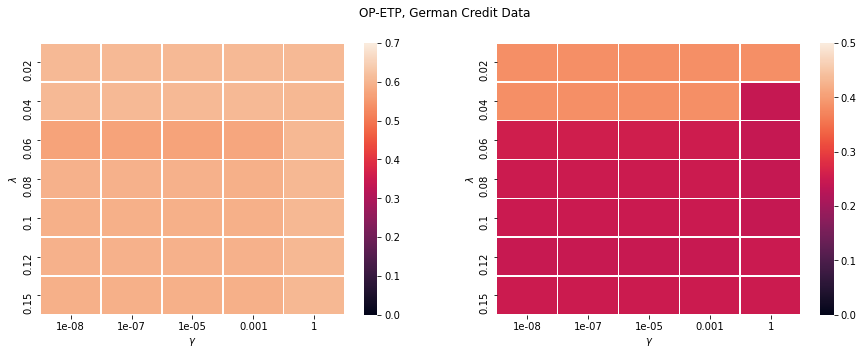

In [226]:
import numpy as np; np.random.seed(0)
import seaborn as sns

# uniform_data = np.random.rand(10, 12)    
# uniform_data2 = np.random.rand(100, 120)

figs, ax =plt.subplots(1,2,figsize=(15, 5))

ax1 = sns.heatmap(fig1, linewidth=0.5, xticklabels=plist1, yticklabels=np.sort(ss1), ax=ax[0],vmin=0, vmax=0.7)
ax1.set(xlabel='$\gamma$', ylabel='$\lambda$') 

ax2 = sns.heatmap(fig2, linewidth=0.5, xticklabels=plist2, yticklabels=np.sort(ss2), ax=ax[1],vmin=0, vmax=0.5)
ax2.set(xlabel='$\gamma$', ylabel='$\lambda$') 
plt.suptitle('OP-ETP, German Credit Data')
# sns.heatmap(uniform_data, ax=ax[0])
# sns.heatmap(uniform_data2, ax=ax[1])
plt.savefig('GermanRatioETP.jpg')
plt.show()